In [1]:
# Import useful libraries
import numpy as np
from ci_test import ci_test
from scipy.io import loadmat
import networkx as nx
from itertools import chain, combinations, permutations
from helpers import *
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
# Importing data to use for cross validation (500 * 5)
validation_data = loadmat('data2.mat')['D2']

In [6]:
G = build_moralized_graph(validation_data, alpha = 0.01)

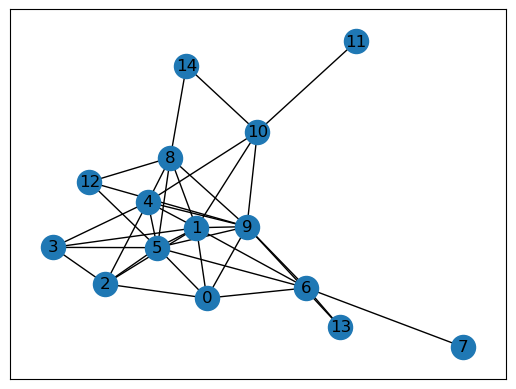

In [7]:
nx.draw_networkx(G,with_labels=True)

In [23]:
build_neighbors_dictionary(G, validation_data, 0.01)

{0: [2, 6, 9],
 1: [2, 3, 10],
 2: [0, 1, 5],
 3: [1, 4, 5],
 4: [3, 5, 10],
 5: [2, 3, 4, 6, 12],
 6: [0, 5, 7, 13],
 7: [6],
 8: [12, 14],
 9: [0, 12, 13],
 10: [1, 4, 11, 14],
 11: [10],
 12: [5, 8, 9],
 13: [6, 9],
 14: [8, 10]}

In [31]:
new_G = second_step_GS(G,validation_data, 0.01)

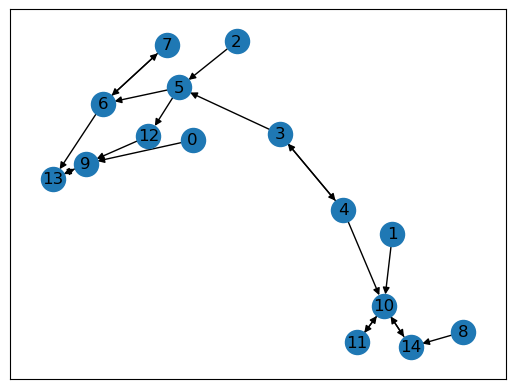

In [32]:
nx.draw_networkx(new_G)